<a href="https://colab.research.google.com/github/2303A51046/PDS_B16_1046/blob/main/python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [3]:
df = pd.read_csv('heart.csv')
print(df.shape)
display(df.head())
display(df.isna().sum())


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
print('RandomForest Accuracy:', accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print('DecisionTree Accuracy:', accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


RandomForest Accuracy: 0.8360655737704918
[[19  9]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

DecisionTree Accuracy: 0.7049180327868853
[[17 11]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



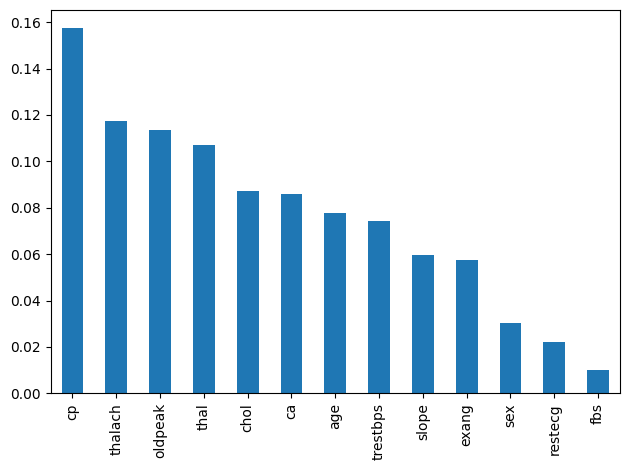

In [7]:
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()
